# Import Prerequisites

In [168]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns

# machine learning
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from scipy.stats import randint
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #|=> MSE(The less the better)
                                                                              #|=> MAE(The less the better)
                                                                              #|=> R2(The more the better)



# Load Dataset

In [67]:
data=load_wine().data
target=load_wine().target
f_names=load_wine().feature_names
f_targets=load_wine().target_names

In [68]:
df = pd.DataFrame(data, columns=f_names)


# Understand Data


1. Describe Data

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.info()

2. EDA - Descriptive

In [ ]:
df.isna().sum().sum()
df.dropna()

In [ ]:
df.duplicated()
df.drop_duplicates()

3. EDA-Viz

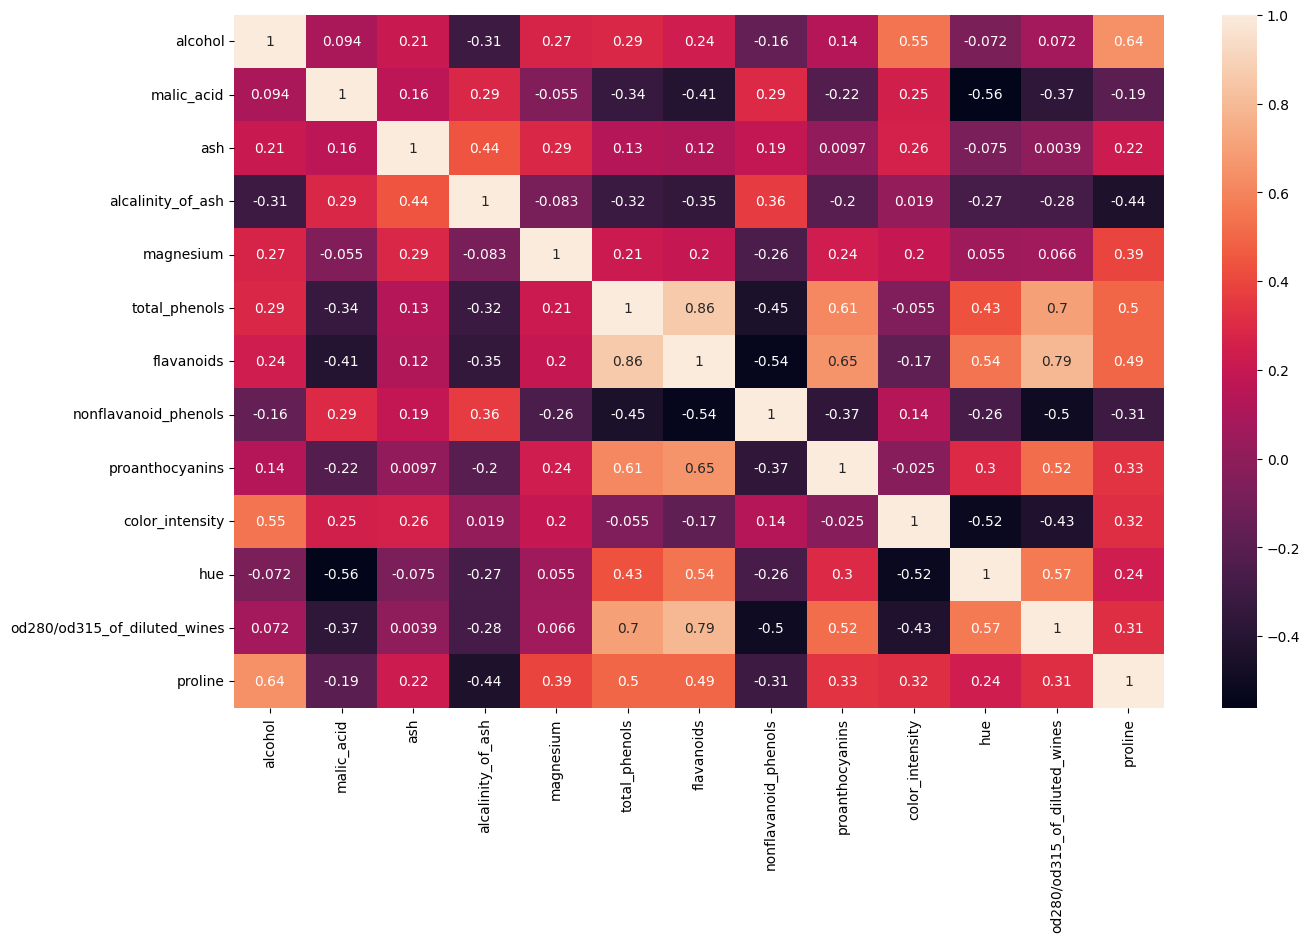

In [ ]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True);

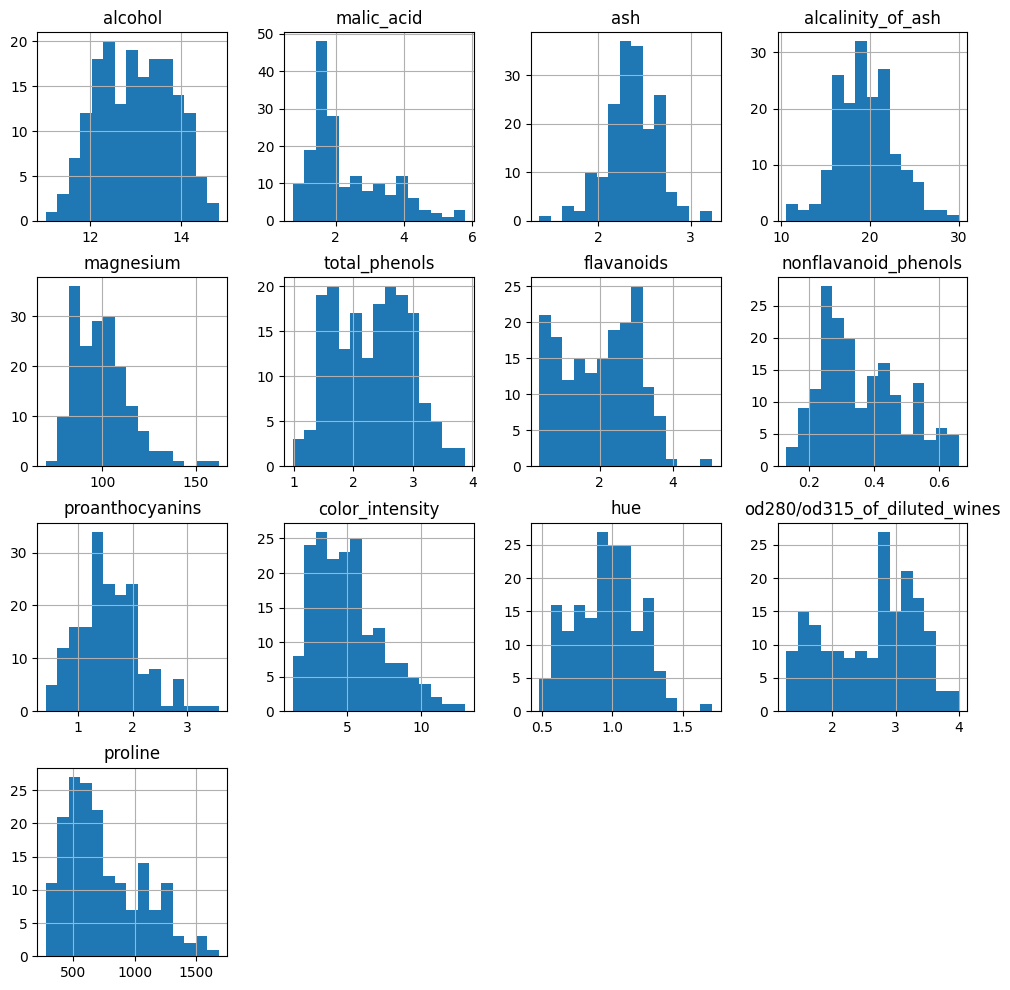

In [ ]:
df.hist(bins=15,figsize=(12,12))
plt.show()

In [128]:
y = df["alcohol"] #==> target
X = df.drop(['alcohol','hue','nonflavanoid_phenols','od280/od315_of_diluted_wines','malic_acid'],axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  shuffle=True,
                                                  test_size=0.2,
                                                  random_state=42
                                                  )

Index(['ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids',
       'proanthocyanins', 'color_intensity', 'proline'],
      dtype='object')

In [129]:
mms=MinMaxScaler()
mms.fit(X_train)# 2:30
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In [167]:
neighbors=dict()
for i in range(2,20):
    knn_reg = KNeighborsRegressor(n_neighbors=i)
    knn_reg.fit(X_train, y_train)
    y_pred = knn_reg.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse=mean_squared_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    neighbors[i]="{:.2f}".format(r2)
    print(f'n_neighbors: {i}, r2: {"{:.2f}".format(r2)}')
    #n_neighbors: 6, r2: 0.79
    #n_neighbors: 7, r2: 0.79

n_neighbors: 2, r2: 0.59
n_neighbors: 3, r2: 0.72
n_neighbors: 4, r2: 0.69
n_neighbors: 5, r2: 0.76
n_neighbors: 6, r2: 0.79
n_neighbors: 7, r2: 0.79
n_neighbors: 8, r2: 0.78
n_neighbors: 9, r2: 0.76
n_neighbors: 10, r2: 0.75
n_neighbors: 11, r2: 0.75
n_neighbors: 12, r2: 0.74
n_neighbors: 13, r2: 0.76
n_neighbors: 14, r2: 0.75
n_neighbors: 15, r2: 0.76
n_neighbors: 16, r2: 0.76
n_neighbors: 17, r2: 0.75
n_neighbors: 18, r2: 0.74
n_neighbors: 19, r2: 0.74


## Create the model

In [169]:
model = RandomForestRegressor(random_state=42)
param_random = {
    'n_estimators': [99],
    'max_depth': [10],
    'min_samples_split': [20],
    'min_samples_leaf': [6],
    'bootstrap': [True],
}

## Perform Randomized Search

In [170]:
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_random, cv=5, n_jobs=-1, verbose=2, n_iter=100, random_state=42)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


## Predictions and evaluation

In [171]:
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

## show

In [172]:
random_search.best_params_, r2, rmse
# r2=0.77

({'n_estimators': 99,
  'min_samples_split': 20,
  'min_samples_leaf': 6,
  'max_depth': 10,
  'bootstrap': True},
 0.7742920176191045,
 0.3670909238655562)